In [1]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("C:/Users/benz_/PycharmProjects/pythonProject1/titanic/train.csv")
test = pd.read_csv("C:/Users/benz_/PycharmProjects/pythonProject1/titanic/test.csv")
ss = pd.read_csv("C:/Users/benz_/PycharmProjects/pythonProject1/titanic/gender_submission.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


In [6]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
ss.shape

(418, 2)

In [8]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [9]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [10]:
# Missing data in test set by columns 

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<AxesSubplot:>

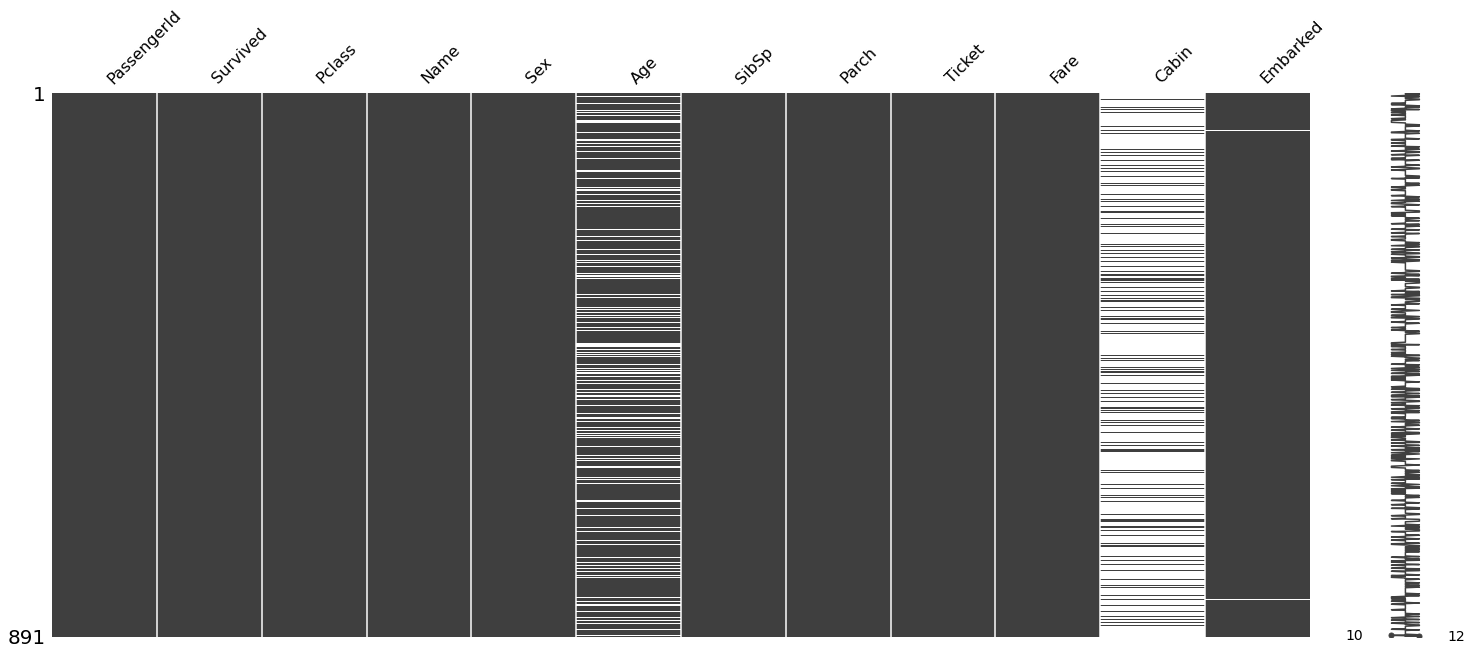

In [11]:
# Missing data in training set

missingno.matrix(train)

<AxesSubplot:>

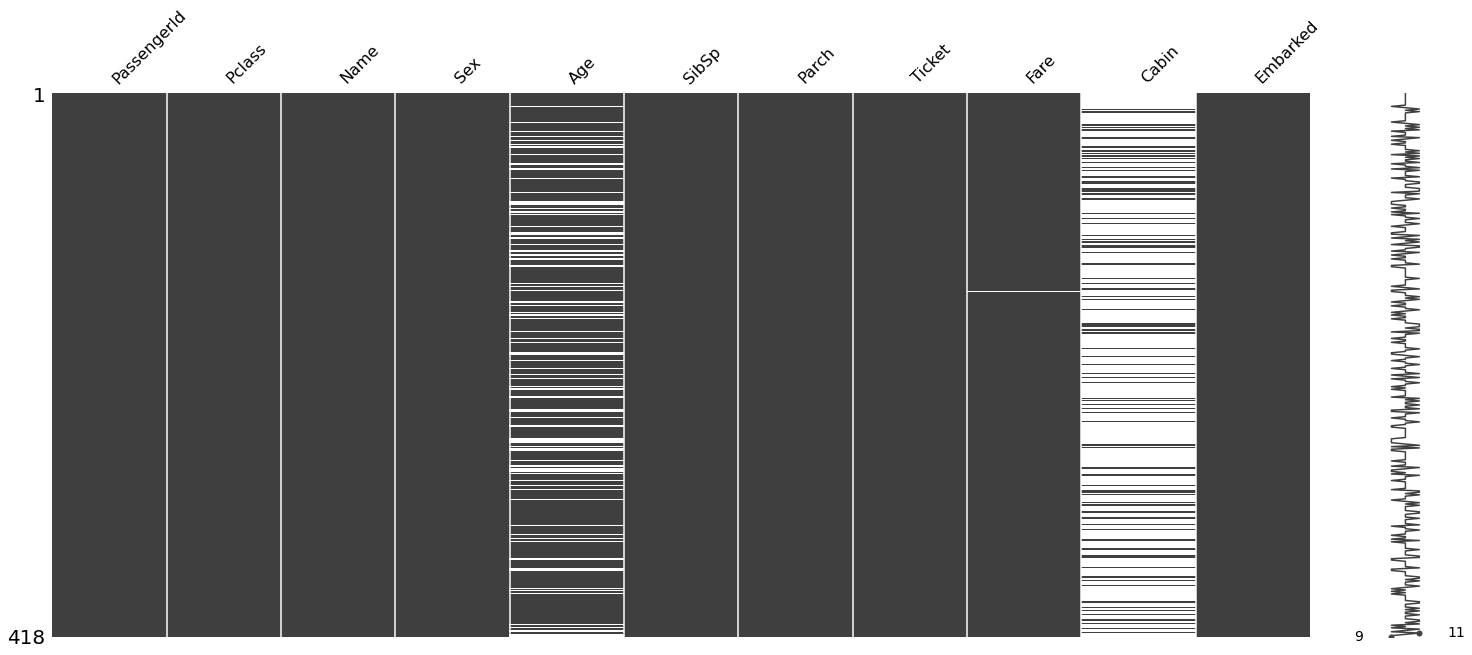

In [12]:
# Missing data in test set 

missingno.matrix(test)

In [13]:
# Summary statistics for training set 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Summary statistics for test set 

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
# Value counts of the sex column

train['Sex'].value_counts(dropna = False)

# Comment: There are more male passengers than female passengers on titanic

male      577
female    314
Name: Sex, dtype: int64

In [16]:
# Mean of survival by sex

train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

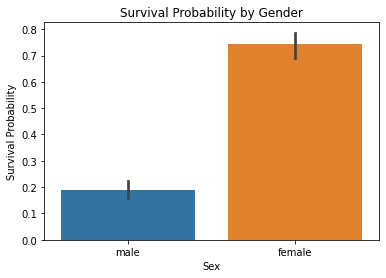

In [17]:
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

# Comment: Female passengers are more likely to survive

In [18]:
# Value counts of the Pclass column 

train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
# Mean of survival by passenger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

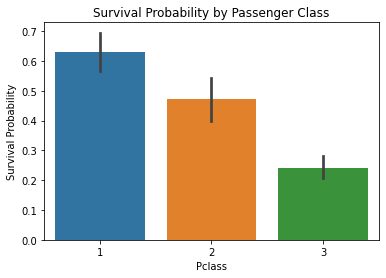

In [20]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

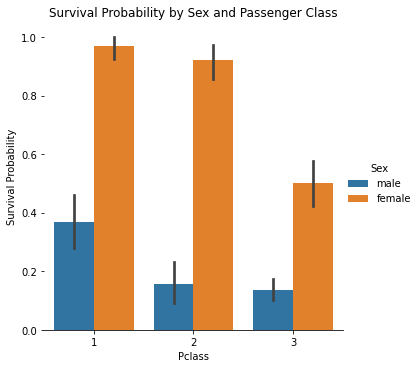

In [21]:
# Survival by gender and passenger class

g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

In [22]:
# Value counts of the Embarked column 

train['Embarked'].value_counts(dropna = False)

# Comment: Two missing values in the Embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [23]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

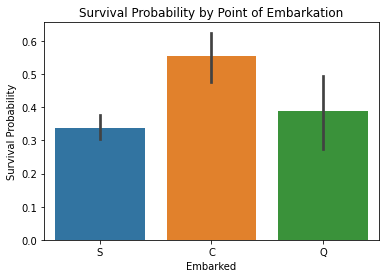

In [24]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

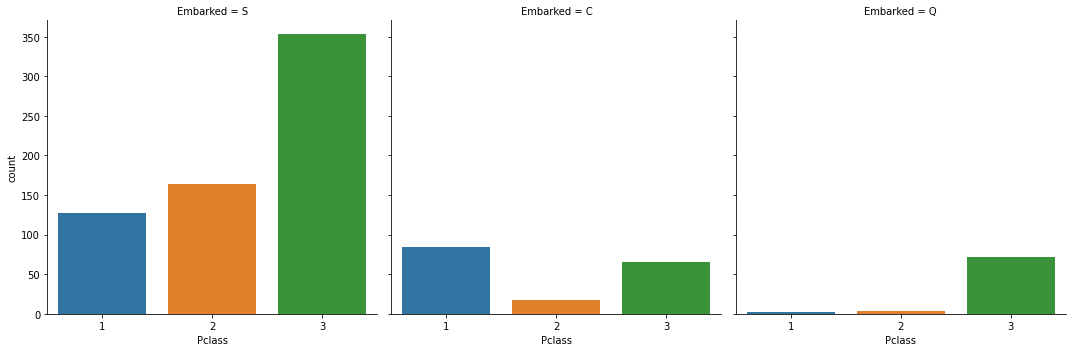

In [25]:
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

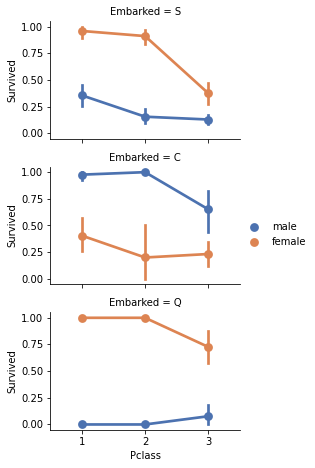

In [26]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(train, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

In [27]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [28]:
# Outliers in numerical variables

train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [29]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


<AxesSubplot:>

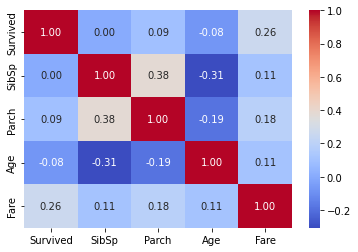

In [30]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

In [31]:
# Value counts of the SibSp column 

train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [32]:
# Mean of survival by SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

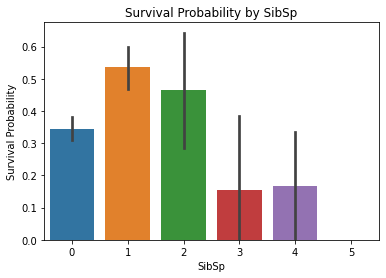

In [33]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [34]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
# Mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

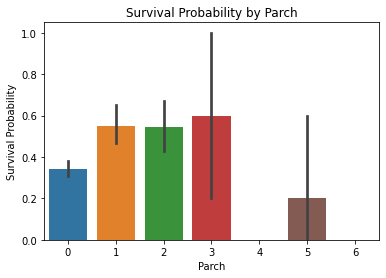

In [36]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

In [37]:
# Null values in Age column 

train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

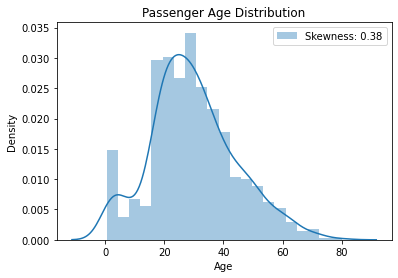

In [38]:
# Passenger age distribution

sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

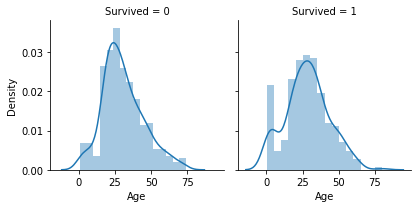

In [39]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

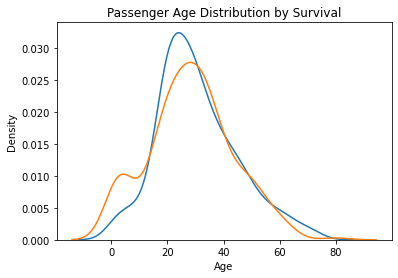

In [40]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

In [41]:
# Null values of Fare column 

train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

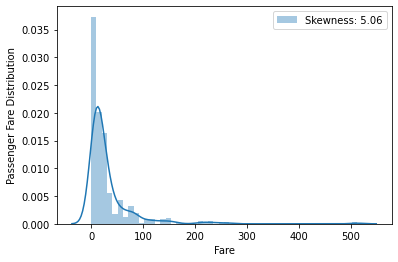

In [42]:
# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

In [43]:
# Drop ticket and cabin features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [44]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [45]:
# Compute the most frequent value of Embarked in training set

mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [46]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace = True)

In [47]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [48]:
# Compute median of Fare in test set 

median = test['Fare'].dropna().median()
median

14.4542

In [49]:
# Fill missing value in Fare with median

test['Fare'].fillna(median, inplace = True)

In [50]:
# Combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [51]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [52]:
# Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

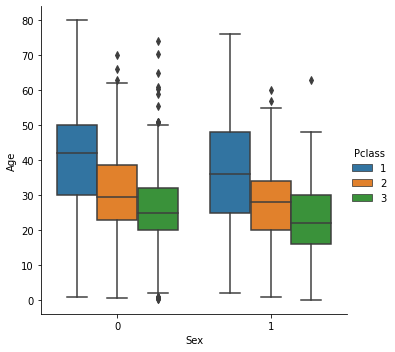

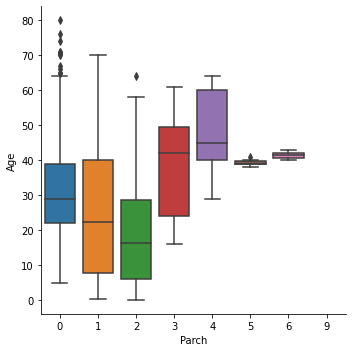

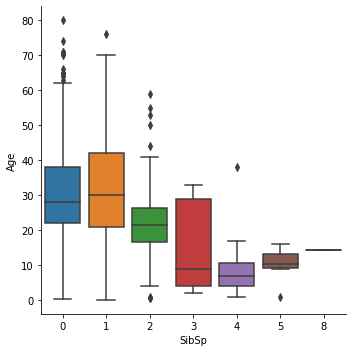

In [53]:
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine)

<AxesSubplot:>

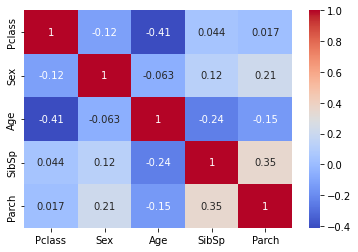

In [54]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

In [55]:
# Check number of missing ages 

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

In [56]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [57]:
# Make sure there is no more missing ages 

combine['Age'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger Fare Distribution')

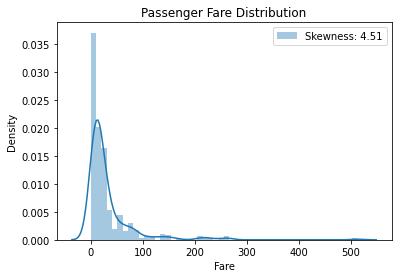

In [58]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [59]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

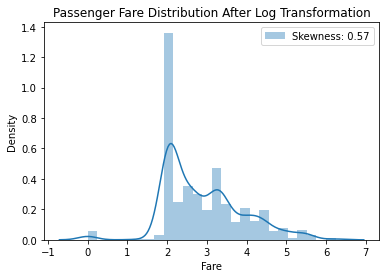

In [60]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

In [61]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [62]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [63]:
# Value counts of Title

combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [64]:
# Number of unique Title

combine['Title'].nunique()

18

In [65]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

<AxesSubplot:xlabel='Title', ylabel='count'>

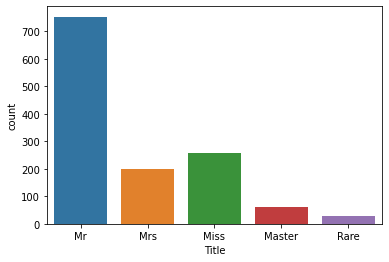

In [66]:
sns.countplot(combine['Title'])

In [67]:
# Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of survival by Title')

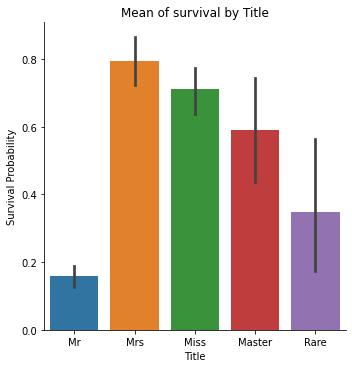

In [68]:
sns.factorplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [69]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


In [70]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [71]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [72]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [73]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [74]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


In [75]:
# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [76]:
# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [77]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [78]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [79]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int32')

In [80]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [81]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [82]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [83]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [84]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [85]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [86]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [87]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [88]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [89]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [90]:
# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [91]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [92]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [93]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [94]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


In [95]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.93

In [96]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

In [97]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.34

In [98]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.11

In [99]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.57

In [100]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

In [101]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.55

In [102]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

In [103]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

In [104]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.00976
0:	learn: 0.6868136	total: 139ms	remaining: 2m 18s
1:	learn: 0.6798485	total: 139ms	remaining: 1m 9s
2:	learn: 0.6729520	total: 140ms	remaining: 46.5s
3:	learn: 0.6669729	total: 141ms	remaining: 35s
4:	learn: 0.6607853	total: 141ms	remaining: 28.1s
5:	learn: 0.6554568	total: 142ms	remaining: 23.5s
6:	learn: 0.6500727	total: 142ms	remaining: 20.2s
7:	learn: 0.6437982	total: 143ms	remaining: 17.7s
8:	learn: 0.6398272	total: 143ms	remaining: 15.8s
9:	learn: 0.6351628	total: 144ms	remaining: 14.3s
10:	learn: 0.6305969	total: 144ms	remaining: 13s
11:	learn: 0.6252274	total: 145ms	remaining: 11.9s
12:	learn: 0.6203165	total: 146ms	remaining: 11.1s
13:	learn: 0.6163249	total: 146ms	remaining: 10.3s
14:	learn: 0.6126752	total: 147ms	remaining: 9.62s
15:	learn: 0.6078515	total: 147ms	remaining: 9.04s
16:	learn: 0.6033553	total: 148ms	remaining: 8.54s
17:	learn: 0.5984437	total: 148ms	remaining: 8.09s
18:	learn: 0.5935188	total: 149ms	remaining: 7.68s
19:	learn: 0.58

347:	learn: 0.3631177	total: 343ms	remaining: 642ms
348:	learn: 0.3630593	total: 343ms	remaining: 641ms
349:	learn: 0.3629609	total: 344ms	remaining: 639ms
350:	learn: 0.3629287	total: 345ms	remaining: 637ms
351:	learn: 0.3629107	total: 345ms	remaining: 635ms
352:	learn: 0.3628362	total: 346ms	remaining: 634ms
353:	learn: 0.3627196	total: 346ms	remaining: 632ms
354:	learn: 0.3626984	total: 347ms	remaining: 630ms
355:	learn: 0.3625393	total: 347ms	remaining: 629ms
356:	learn: 0.3624853	total: 348ms	remaining: 627ms
357:	learn: 0.3624021	total: 349ms	remaining: 625ms
358:	learn: 0.3623386	total: 349ms	remaining: 624ms
359:	learn: 0.3622635	total: 350ms	remaining: 622ms
360:	learn: 0.3622490	total: 350ms	remaining: 620ms
361:	learn: 0.3621768	total: 351ms	remaining: 619ms
362:	learn: 0.3620411	total: 352ms	remaining: 617ms
363:	learn: 0.3619301	total: 352ms	remaining: 616ms
364:	learn: 0.3619248	total: 353ms	remaining: 614ms
365:	learn: 0.3618749	total: 353ms	remaining: 612ms
366:	learn: 

617:	learn: 0.3474937	total: 512ms	remaining: 316ms
618:	learn: 0.3474243	total: 513ms	remaining: 315ms
619:	learn: 0.3473920	total: 513ms	remaining: 315ms
620:	learn: 0.3473333	total: 514ms	remaining: 314ms
621:	learn: 0.3473147	total: 514ms	remaining: 313ms
622:	learn: 0.3472741	total: 515ms	remaining: 312ms
623:	learn: 0.3472380	total: 516ms	remaining: 311ms
624:	learn: 0.3471901	total: 516ms	remaining: 310ms
625:	learn: 0.3471547	total: 517ms	remaining: 309ms
626:	learn: 0.3471109	total: 518ms	remaining: 308ms
627:	learn: 0.3470518	total: 518ms	remaining: 307ms
628:	learn: 0.3470134	total: 519ms	remaining: 306ms
629:	learn: 0.3470131	total: 519ms	remaining: 305ms
630:	learn: 0.3469508	total: 520ms	remaining: 304ms
631:	learn: 0.3468346	total: 520ms	remaining: 303ms
632:	learn: 0.3467972	total: 521ms	remaining: 302ms
633:	learn: 0.3467507	total: 522ms	remaining: 301ms
634:	learn: 0.3467121	total: 522ms	remaining: 300ms
635:	learn: 0.3466751	total: 523ms	remaining: 299ms
636:	learn: 

894:	learn: 0.3362840	total: 680ms	remaining: 79.7ms
895:	learn: 0.3362485	total: 680ms	remaining: 79ms
896:	learn: 0.3362115	total: 681ms	remaining: 78.2ms
897:	learn: 0.3361695	total: 681ms	remaining: 77.4ms
898:	learn: 0.3361286	total: 682ms	remaining: 76.6ms
899:	learn: 0.3360950	total: 683ms	remaining: 75.9ms
900:	learn: 0.3360615	total: 683ms	remaining: 75.1ms
901:	learn: 0.3360216	total: 684ms	remaining: 74.3ms
902:	learn: 0.3359619	total: 685ms	remaining: 73.6ms
903:	learn: 0.3359140	total: 685ms	remaining: 72.8ms
904:	learn: 0.3358963	total: 686ms	remaining: 72ms
905:	learn: 0.3358740	total: 687ms	remaining: 71.2ms
906:	learn: 0.3358385	total: 687ms	remaining: 70.5ms
907:	learn: 0.3358056	total: 688ms	remaining: 69.7ms
908:	learn: 0.3357573	total: 688ms	remaining: 68.9ms
909:	learn: 0.3357190	total: 689ms	remaining: 68.1ms
910:	learn: 0.3356744	total: 690ms	remaining: 67.4ms
911:	learn: 0.3356386	total: 690ms	remaining: 66.6ms
912:	learn: 0.3356214	total: 691ms	remaining: 65.8

In [105]:
acc_catboost

85.7

In [106]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,85.70
1,Decision Tree,85.70
2,CatBoost,85.70
3,KNN,84.34
4,Support Vector Machines,83.09
5,Logistic Regression,80.93
6,Linear SVC,80.25
7,Perceptron,79.57
8,Naive Bayes,79.11
9,Stochastic Gradient Decent,78.55


In [107]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [108]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870154	total: 680us	remaining: 679ms
1:	learn: 0.6803102	total: 1.35ms	remaining: 673ms
2:	learn: 0.6743326	total: 1.96ms	remaining: 650ms
3:	learn: 0.6684760	total: 2.54ms	remaining: 632ms
4:	learn: 0.6624557	total: 3.13ms	remaining: 624ms
5:	learn: 0.6573314	total: 3.82ms	remaining: 633ms
6:	learn: 0.6520748	total: 4.39ms	remaining: 623ms
7:	learn: 0.6460856	total: 4.96ms	remaining: 616ms
8:	learn: 0.6422711	total: 5.49ms	remaining: 605ms
9:	learn: 0.6376840	total: 6.11ms	remaining: 604ms
10:	learn: 0.6326541	total: 6.69ms	remaining: 602ms
11:	learn: 0.6272334	total: 7.25ms	remaining: 597ms
12:	learn: 0.6224744	total: 7.74ms	remaining: 588ms
13:	learn: 0.6175199	total: 8.29ms	remaining: 584ms
14:	learn: 0.6124417	total: 8.85ms	remaining: 581ms
15:	learn: 0.6097890	total: 9.17ms	remaining: 564ms
16:	learn: 0.6050558	total: 9.77ms	remaining: 565ms
17:	learn: 0.6004952	total: 10.3ms	remaining: 564ms
18:	learn: 0.5958639	total: 10.9ms	remaining:

277:	learn: 0.3677030	total: 161ms	remaining: 419ms
278:	learn: 0.3675117	total: 162ms	remaining: 418ms
279:	learn: 0.3674423	total: 162ms	remaining: 418ms
280:	learn: 0.3672050	total: 163ms	remaining: 417ms
281:	learn: 0.3670241	total: 164ms	remaining: 417ms
282:	learn: 0.3667992	total: 164ms	remaining: 416ms
283:	learn: 0.3666190	total: 165ms	remaining: 416ms
284:	learn: 0.3664522	total: 166ms	remaining: 415ms
285:	learn: 0.3663085	total: 166ms	remaining: 415ms
286:	learn: 0.3662986	total: 167ms	remaining: 414ms
287:	learn: 0.3660214	total: 167ms	remaining: 414ms
288:	learn: 0.3657943	total: 168ms	remaining: 413ms
289:	learn: 0.3657784	total: 168ms	remaining: 412ms
290:	learn: 0.3656649	total: 169ms	remaining: 412ms
291:	learn: 0.3655111	total: 170ms	remaining: 412ms
292:	learn: 0.3654359	total: 170ms	remaining: 411ms
293:	learn: 0.3653119	total: 171ms	remaining: 411ms
294:	learn: 0.3651212	total: 172ms	remaining: 410ms
295:	learn: 0.3650702	total: 172ms	remaining: 409ms
296:	learn: 

550:	learn: 0.3441675	total: 329ms	remaining: 268ms
551:	learn: 0.3440932	total: 329ms	remaining: 267ms
552:	learn: 0.3440398	total: 330ms	remaining: 267ms
553:	learn: 0.3439665	total: 331ms	remaining: 266ms
554:	learn: 0.3438358	total: 331ms	remaining: 266ms
555:	learn: 0.3438297	total: 332ms	remaining: 265ms
556:	learn: 0.3438278	total: 332ms	remaining: 264ms
557:	learn: 0.3437445	total: 333ms	remaining: 264ms
558:	learn: 0.3437039	total: 333ms	remaining: 263ms
559:	learn: 0.3436563	total: 334ms	remaining: 263ms
560:	learn: 0.3436320	total: 335ms	remaining: 262ms
561:	learn: 0.3435094	total: 336ms	remaining: 262ms
562:	learn: 0.3434800	total: 336ms	remaining: 261ms
563:	learn: 0.3434155	total: 337ms	remaining: 261ms
564:	learn: 0.3434003	total: 338ms	remaining: 260ms
565:	learn: 0.3433925	total: 338ms	remaining: 259ms
566:	learn: 0.3433335	total: 339ms	remaining: 259ms
567:	learn: 0.3432757	total: 339ms	remaining: 258ms
568:	learn: 0.3432087	total: 340ms	remaining: 258ms
569:	learn: 

810:	learn: 0.3319439	total: 498ms	remaining: 116ms
811:	learn: 0.3319274	total: 498ms	remaining: 115ms
812:	learn: 0.3318782	total: 499ms	remaining: 115ms
813:	learn: 0.3318494	total: 500ms	remaining: 114ms
814:	learn: 0.3317794	total: 500ms	remaining: 114ms
815:	learn: 0.3317431	total: 501ms	remaining: 113ms
816:	learn: 0.3317150	total: 502ms	remaining: 112ms
817:	learn: 0.3317060	total: 502ms	remaining: 112ms
818:	learn: 0.3316687	total: 503ms	remaining: 111ms
819:	learn: 0.3316028	total: 503ms	remaining: 110ms
820:	learn: 0.3315427	total: 504ms	remaining: 110ms
821:	learn: 0.3314944	total: 504ms	remaining: 109ms
822:	learn: 0.3314543	total: 505ms	remaining: 109ms
823:	learn: 0.3313697	total: 506ms	remaining: 108ms
824:	learn: 0.3313235	total: 506ms	remaining: 107ms
825:	learn: 0.3312831	total: 507ms	remaining: 107ms
826:	learn: 0.3312469	total: 507ms	remaining: 106ms
827:	learn: 0.3312013	total: 508ms	remaining: 106ms
828:	learn: 0.3311380	total: 509ms	remaining: 105ms
829:	learn: 

44:	learn: 0.5151133	total: 24.9ms	remaining: 528ms
45:	learn: 0.5123317	total: 25.6ms	remaining: 530ms
46:	learn: 0.5099402	total: 26.1ms	remaining: 530ms
47:	learn: 0.5074027	total: 26.7ms	remaining: 530ms
48:	learn: 0.5047832	total: 27.4ms	remaining: 531ms
49:	learn: 0.5022879	total: 27.9ms	remaining: 531ms
50:	learn: 0.5003881	total: 28.5ms	remaining: 531ms
51:	learn: 0.4982005	total: 29.1ms	remaining: 530ms
52:	learn: 0.4967938	total: 29.5ms	remaining: 528ms
53:	learn: 0.4946932	total: 30.1ms	remaining: 527ms
54:	learn: 0.4927510	total: 30.6ms	remaining: 527ms
55:	learn: 0.4908669	total: 31.2ms	remaining: 526ms
56:	learn: 0.4889224	total: 31.8ms	remaining: 526ms
57:	learn: 0.4865368	total: 32.4ms	remaining: 526ms
58:	learn: 0.4850166	total: 33ms	remaining: 526ms
59:	learn: 0.4832974	total: 33.5ms	remaining: 525ms
60:	learn: 0.4816172	total: 34ms	remaining: 524ms
61:	learn: 0.4800253	total: 34.6ms	remaining: 523ms
62:	learn: 0.4778632	total: 35.1ms	remaining: 523ms
63:	learn: 0.476

328:	learn: 0.3671789	total: 193ms	remaining: 394ms
329:	learn: 0.3670307	total: 194ms	remaining: 393ms
330:	learn: 0.3669939	total: 194ms	remaining: 392ms
331:	learn: 0.3668257	total: 195ms	remaining: 392ms
332:	learn: 0.3666778	total: 196ms	remaining: 392ms
333:	learn: 0.3666293	total: 196ms	remaining: 391ms
334:	learn: 0.3664950	total: 197ms	remaining: 391ms
335:	learn: 0.3664381	total: 197ms	remaining: 390ms
336:	learn: 0.3663014	total: 198ms	remaining: 389ms
337:	learn: 0.3661585	total: 199ms	remaining: 389ms
338:	learn: 0.3660450	total: 199ms	remaining: 388ms
339:	learn: 0.3659201	total: 200ms	remaining: 388ms
340:	learn: 0.3657251	total: 200ms	remaining: 387ms
341:	learn: 0.3657149	total: 201ms	remaining: 386ms
342:	learn: 0.3656625	total: 201ms	remaining: 386ms
343:	learn: 0.3655262	total: 202ms	remaining: 385ms
344:	learn: 0.3654498	total: 203ms	remaining: 384ms
345:	learn: 0.3652894	total: 203ms	remaining: 384ms
346:	learn: 0.3651767	total: 204ms	remaining: 383ms
347:	learn: 

596:	learn: 0.3483006	total: 362ms	remaining: 245ms
597:	learn: 0.3482995	total: 363ms	remaining: 244ms
598:	learn: 0.3482421	total: 363ms	remaining: 243ms
599:	learn: 0.3481880	total: 364ms	remaining: 243ms
600:	learn: 0.3481547	total: 365ms	remaining: 242ms
601:	learn: 0.3481223	total: 365ms	remaining: 241ms
602:	learn: 0.3480695	total: 366ms	remaining: 241ms
603:	learn: 0.3480202	total: 366ms	remaining: 240ms
604:	learn: 0.3479823	total: 367ms	remaining: 240ms
605:	learn: 0.3479552	total: 368ms	remaining: 239ms
606:	learn: 0.3478781	total: 368ms	remaining: 238ms
607:	learn: 0.3478417	total: 369ms	remaining: 238ms
608:	learn: 0.3477774	total: 369ms	remaining: 237ms
609:	learn: 0.3477238	total: 370ms	remaining: 237ms
610:	learn: 0.3476707	total: 371ms	remaining: 236ms
611:	learn: 0.3476236	total: 371ms	remaining: 235ms
612:	learn: 0.3475814	total: 372ms	remaining: 235ms
613:	learn: 0.3475417	total: 372ms	remaining: 234ms
614:	learn: 0.3474860	total: 373ms	remaining: 233ms
615:	learn: 

881:	learn: 0.3352798	total: 530ms	remaining: 70.9ms
882:	learn: 0.3352402	total: 531ms	remaining: 70.3ms
883:	learn: 0.3352016	total: 531ms	remaining: 69.7ms
884:	learn: 0.3351398	total: 532ms	remaining: 69.1ms
885:	learn: 0.3351170	total: 533ms	remaining: 68.5ms
886:	learn: 0.3350928	total: 533ms	remaining: 67.9ms
887:	learn: 0.3350446	total: 534ms	remaining: 67.3ms
888:	learn: 0.3349822	total: 535ms	remaining: 66.7ms
889:	learn: 0.3349350	total: 535ms	remaining: 66.1ms
890:	learn: 0.3348872	total: 536ms	remaining: 65.5ms
891:	learn: 0.3348358	total: 536ms	remaining: 64.9ms
892:	learn: 0.3348079	total: 537ms	remaining: 64.3ms
893:	learn: 0.3347509	total: 538ms	remaining: 63.7ms
894:	learn: 0.3347509	total: 538ms	remaining: 63.1ms
895:	learn: 0.3346960	total: 538ms	remaining: 62.5ms
896:	learn: 0.3346765	total: 539ms	remaining: 61.9ms
897:	learn: 0.3346130	total: 540ms	remaining: 61.3ms
898:	learn: 0.3345768	total: 540ms	remaining: 60.7ms
899:	learn: 0.3345452	total: 541ms	remaining: 

105:	learn: 0.4074927	total: 61.1ms	remaining: 515ms
106:	learn: 0.4063368	total: 61.8ms	remaining: 516ms
107:	learn: 0.4055382	total: 62.5ms	remaining: 516ms
108:	learn: 0.4047218	total: 63.1ms	remaining: 515ms
109:	learn: 0.4037550	total: 63.7ms	remaining: 515ms
110:	learn: 0.4034307	total: 64ms	remaining: 513ms
111:	learn: 0.4027912	total: 64.6ms	remaining: 512ms
112:	learn: 0.4020109	total: 65.2ms	remaining: 512ms
113:	learn: 0.4013233	total: 65.8ms	remaining: 511ms
114:	learn: 0.4007452	total: 66.4ms	remaining: 511ms
115:	learn: 0.3997896	total: 67.1ms	remaining: 511ms
116:	learn: 0.3994664	total: 67.6ms	remaining: 510ms
117:	learn: 0.3990150	total: 68ms	remaining: 509ms
118:	learn: 0.3982674	total: 68.7ms	remaining: 508ms
119:	learn: 0.3976391	total: 69.3ms	remaining: 508ms
120:	learn: 0.3969441	total: 69.9ms	remaining: 508ms
121:	learn: 0.3960321	total: 70.5ms	remaining: 507ms
122:	learn: 0.3950744	total: 71.3ms	remaining: 508ms
123:	learn: 0.3944103	total: 71.9ms	remaining: 508

387:	learn: 0.3403891	total: 229ms	remaining: 362ms
388:	learn: 0.3403150	total: 230ms	remaining: 361ms
389:	learn: 0.3402304	total: 231ms	remaining: 361ms
390:	learn: 0.3402052	total: 231ms	remaining: 360ms
391:	learn: 0.3401120	total: 232ms	remaining: 360ms
392:	learn: 0.3400548	total: 232ms	remaining: 359ms
393:	learn: 0.3400008	total: 233ms	remaining: 358ms
394:	learn: 0.3399297	total: 234ms	remaining: 358ms
395:	learn: 0.3397886	total: 234ms	remaining: 357ms
396:	learn: 0.3397128	total: 235ms	remaining: 357ms
397:	learn: 0.3396705	total: 235ms	remaining: 356ms
398:	learn: 0.3395860	total: 236ms	remaining: 355ms
399:	learn: 0.3395042	total: 236ms	remaining: 355ms
400:	learn: 0.3394779	total: 237ms	remaining: 354ms
401:	learn: 0.3393059	total: 238ms	remaining: 353ms
402:	learn: 0.3392463	total: 238ms	remaining: 353ms
403:	learn: 0.3392002	total: 239ms	remaining: 352ms
404:	learn: 0.3391557	total: 239ms	remaining: 351ms
405:	learn: 0.3390411	total: 240ms	remaining: 351ms
406:	learn: 

677:	learn: 0.3232428	total: 398ms	remaining: 189ms
678:	learn: 0.3232097	total: 399ms	remaining: 189ms
679:	learn: 0.3231623	total: 400ms	remaining: 188ms
680:	learn: 0.3230845	total: 401ms	remaining: 188ms
681:	learn: 0.3230837	total: 401ms	remaining: 187ms
682:	learn: 0.3230371	total: 402ms	remaining: 186ms
683:	learn: 0.3229962	total: 402ms	remaining: 186ms
684:	learn: 0.3228946	total: 403ms	remaining: 185ms
685:	learn: 0.3228731	total: 403ms	remaining: 185ms
686:	learn: 0.3228361	total: 404ms	remaining: 184ms
687:	learn: 0.3227090	total: 404ms	remaining: 183ms
688:	learn: 0.3226548	total: 405ms	remaining: 183ms
689:	learn: 0.3226548	total: 405ms	remaining: 182ms
690:	learn: 0.3226388	total: 406ms	remaining: 181ms
691:	learn: 0.3226162	total: 406ms	remaining: 181ms
692:	learn: 0.3225976	total: 407ms	remaining: 180ms
693:	learn: 0.3225101	total: 407ms	remaining: 180ms
694:	learn: 0.3224633	total: 408ms	remaining: 179ms
695:	learn: 0.3224341	total: 409ms	remaining: 179ms
696:	learn: 

937:	learn: 0.3126932	total: 565ms	remaining: 37.4ms
938:	learn: 0.3126595	total: 566ms	remaining: 36.8ms
939:	learn: 0.3126278	total: 566ms	remaining: 36.2ms
940:	learn: 0.3125799	total: 567ms	remaining: 35.6ms
941:	learn: 0.3125631	total: 568ms	remaining: 35ms
942:	learn: 0.3125227	total: 568ms	remaining: 34.4ms
943:	learn: 0.3124897	total: 569ms	remaining: 33.8ms
944:	learn: 0.3124378	total: 570ms	remaining: 33.2ms
945:	learn: 0.3124177	total: 570ms	remaining: 32.6ms
946:	learn: 0.3123943	total: 571ms	remaining: 31.9ms
947:	learn: 0.3123485	total: 571ms	remaining: 31.3ms
948:	learn: 0.3122929	total: 572ms	remaining: 30.7ms
949:	learn: 0.3122724	total: 573ms	remaining: 30.1ms
950:	learn: 0.3121939	total: 573ms	remaining: 29.5ms
951:	learn: 0.3121734	total: 574ms	remaining: 28.9ms
952:	learn: 0.3121441	total: 574ms	remaining: 28.3ms
953:	learn: 0.3120974	total: 575ms	remaining: 27.7ms
954:	learn: 0.3120802	total: 576ms	remaining: 27.1ms
955:	learn: 0.3120519	total: 577ms	remaining: 26

162:	learn: 0.3968488	total: 96.2ms	remaining: 494ms
163:	learn: 0.3964330	total: 96.9ms	remaining: 494ms
164:	learn: 0.3958656	total: 97.6ms	remaining: 494ms
165:	learn: 0.3956993	total: 98.2ms	remaining: 493ms
166:	learn: 0.3953907	total: 98.7ms	remaining: 492ms
167:	learn: 0.3948579	total: 99.4ms	remaining: 492ms
168:	learn: 0.3942929	total: 100ms	remaining: 492ms
169:	learn: 0.3939460	total: 101ms	remaining: 492ms
170:	learn: 0.3936777	total: 101ms	remaining: 492ms
171:	learn: 0.3933696	total: 102ms	remaining: 491ms
172:	learn: 0.3930845	total: 103ms	remaining: 491ms
173:	learn: 0.3929070	total: 103ms	remaining: 490ms
174:	learn: 0.3925681	total: 104ms	remaining: 490ms
175:	learn: 0.3923383	total: 104ms	remaining: 489ms
176:	learn: 0.3920377	total: 105ms	remaining: 489ms
177:	learn: 0.3918096	total: 106ms	remaining: 489ms
178:	learn: 0.3915366	total: 107ms	remaining: 489ms
179:	learn: 0.3913638	total: 107ms	remaining: 488ms
180:	learn: 0.3910589	total: 108ms	remaining: 487ms
181:	l

439:	learn: 0.3594573	total: 263ms	remaining: 335ms
440:	learn: 0.3593779	total: 264ms	remaining: 334ms
441:	learn: 0.3592611	total: 264ms	remaining: 334ms
442:	learn: 0.3592439	total: 265ms	remaining: 333ms
443:	learn: 0.3591713	total: 266ms	remaining: 333ms
444:	learn: 0.3590225	total: 266ms	remaining: 332ms
445:	learn: 0.3589588	total: 267ms	remaining: 332ms
446:	learn: 0.3589324	total: 268ms	remaining: 331ms
447:	learn: 0.3588845	total: 268ms	remaining: 331ms
448:	learn: 0.3588263	total: 269ms	remaining: 330ms
449:	learn: 0.3587827	total: 270ms	remaining: 329ms
450:	learn: 0.3586674	total: 270ms	remaining: 329ms
451:	learn: 0.3585760	total: 271ms	remaining: 328ms
452:	learn: 0.3585321	total: 271ms	remaining: 328ms
453:	learn: 0.3584129	total: 272ms	remaining: 327ms
454:	learn: 0.3583387	total: 273ms	remaining: 327ms
455:	learn: 0.3583187	total: 273ms	remaining: 326ms
456:	learn: 0.3582931	total: 274ms	remaining: 325ms
457:	learn: 0.3582628	total: 274ms	remaining: 325ms
458:	learn: 

702:	learn: 0.3451109	total: 432ms	remaining: 182ms
703:	learn: 0.3450546	total: 433ms	remaining: 182ms
704:	learn: 0.3449976	total: 433ms	remaining: 181ms
705:	learn: 0.3449590	total: 434ms	remaining: 181ms
706:	learn: 0.3449014	total: 434ms	remaining: 180ms
707:	learn: 0.3448532	total: 435ms	remaining: 179ms
708:	learn: 0.3448333	total: 436ms	remaining: 179ms
709:	learn: 0.3447881	total: 436ms	remaining: 178ms
710:	learn: 0.3446965	total: 437ms	remaining: 178ms
711:	learn: 0.3446628	total: 437ms	remaining: 177ms
712:	learn: 0.3446141	total: 438ms	remaining: 176ms
713:	learn: 0.3446119	total: 438ms	remaining: 176ms
714:	learn: 0.3445772	total: 439ms	remaining: 175ms
715:	learn: 0.3445248	total: 440ms	remaining: 174ms
716:	learn: 0.3444822	total: 440ms	remaining: 174ms
717:	learn: 0.3444271	total: 441ms	remaining: 173ms
718:	learn: 0.3443878	total: 442ms	remaining: 173ms
719:	learn: 0.3443400	total: 442ms	remaining: 172ms
720:	learn: 0.3443084	total: 443ms	remaining: 171ms
721:	learn: 

989:	learn: 0.3334333	total: 600ms	remaining: 6.06ms
990:	learn: 0.3333965	total: 600ms	remaining: 5.45ms
991:	learn: 0.3333609	total: 601ms	remaining: 4.85ms
992:	learn: 0.3333336	total: 602ms	remaining: 4.24ms
993:	learn: 0.3333029	total: 602ms	remaining: 3.63ms
994:	learn: 0.3332778	total: 603ms	remaining: 3.03ms
995:	learn: 0.3332450	total: 603ms	remaining: 2.42ms
996:	learn: 0.3332150	total: 604ms	remaining: 1.82ms
997:	learn: 0.3331704	total: 605ms	remaining: 1.21ms
998:	learn: 0.3331469	total: 605ms	remaining: 605us
999:	learn: 0.3331472	total: 606ms	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6880639	total: 662us	remaining: 661ms
1:	learn: 0.6823125	total: 1.34ms	remaining: 667ms
2:	learn: 0.6762136	total: 1.96ms	remaining: 653ms
3:	learn: 0.6702588	total: 2.56ms	remaining: 638ms
4:	learn: 0.6641973	total: 3.18ms	remaining: 633ms
5:	learn: 0.6590351	total: 3.74ms	remaining: 620ms
6:	learn: 0.6544787	total: 4.37ms	remaining: 620ms
7:	learn: 0.6485151	total: 5.07ms	r

210:	learn: 0.3856939	total: 125ms	remaining: 468ms
211:	learn: 0.3854625	total: 126ms	remaining: 468ms
212:	learn: 0.3852504	total: 127ms	remaining: 468ms
213:	learn: 0.3850571	total: 127ms	remaining: 467ms
214:	learn: 0.3848237	total: 128ms	remaining: 467ms
215:	learn: 0.3844611	total: 129ms	remaining: 467ms
216:	learn: 0.3842638	total: 129ms	remaining: 466ms
217:	learn: 0.3841501	total: 130ms	remaining: 465ms
218:	learn: 0.3838895	total: 130ms	remaining: 465ms
219:	learn: 0.3836888	total: 131ms	remaining: 464ms
220:	learn: 0.3835356	total: 132ms	remaining: 464ms
221:	learn: 0.3832788	total: 132ms	remaining: 463ms
222:	learn: 0.3831831	total: 133ms	remaining: 463ms
223:	learn: 0.3829251	total: 133ms	remaining: 462ms
224:	learn: 0.3826935	total: 134ms	remaining: 462ms
225:	learn: 0.3824047	total: 135ms	remaining: 461ms
226:	learn: 0.3822121	total: 135ms	remaining: 461ms
227:	learn: 0.3819294	total: 136ms	remaining: 461ms
228:	learn: 0.3817724	total: 137ms	remaining: 460ms
229:	learn: 

479:	learn: 0.3567425	total: 293ms	remaining: 318ms
480:	learn: 0.3567402	total: 294ms	remaining: 317ms
481:	learn: 0.3566121	total: 294ms	remaining: 316ms
482:	learn: 0.3565281	total: 295ms	remaining: 316ms
483:	learn: 0.3564714	total: 296ms	remaining: 315ms
484:	learn: 0.3564434	total: 296ms	remaining: 314ms
485:	learn: 0.3563806	total: 297ms	remaining: 314ms
486:	learn: 0.3562839	total: 297ms	remaining: 313ms
487:	learn: 0.3562393	total: 298ms	remaining: 312ms
488:	learn: 0.3562125	total: 298ms	remaining: 312ms
489:	learn: 0.3561231	total: 299ms	remaining: 311ms
490:	learn: 0.3560523	total: 300ms	remaining: 311ms
491:	learn: 0.3560330	total: 300ms	remaining: 310ms
492:	learn: 0.3560228	total: 301ms	remaining: 309ms
493:	learn: 0.3558752	total: 301ms	remaining: 309ms
494:	learn: 0.3557888	total: 302ms	remaining: 308ms
495:	learn: 0.3557042	total: 303ms	remaining: 308ms
496:	learn: 0.3556552	total: 303ms	remaining: 307ms
497:	learn: 0.3555726	total: 304ms	remaining: 307ms
498:	learn: 

748:	learn: 0.3433439	total: 458ms	remaining: 153ms
749:	learn: 0.3432841	total: 458ms	remaining: 153ms
750:	learn: 0.3432382	total: 459ms	remaining: 152ms
751:	learn: 0.3431708	total: 459ms	remaining: 152ms
752:	learn: 0.3431531	total: 460ms	remaining: 151ms
753:	learn: 0.3431345	total: 461ms	remaining: 150ms
754:	learn: 0.3430619	total: 461ms	remaining: 150ms
755:	learn: 0.3430165	total: 462ms	remaining: 149ms
756:	learn: 0.3429497	total: 462ms	remaining: 148ms
757:	learn: 0.3428996	total: 463ms	remaining: 148ms
758:	learn: 0.3428748	total: 464ms	remaining: 147ms
759:	learn: 0.3428711	total: 464ms	remaining: 147ms
760:	learn: 0.3428462	total: 465ms	remaining: 146ms
761:	learn: 0.3427963	total: 465ms	remaining: 145ms
762:	learn: 0.3427761	total: 466ms	remaining: 145ms
763:	learn: 0.3427293	total: 467ms	remaining: 144ms
764:	learn: 0.3426912	total: 467ms	remaining: 143ms
765:	learn: 0.3426456	total: 468ms	remaining: 143ms
766:	learn: 0.3426147	total: 469ms	remaining: 142ms
767:	learn: 

Learning rate set to 0.009331
0:	learn: 0.6870290	total: 850us	remaining: 849ms
1:	learn: 0.6816664	total: 1.38ms	remaining: 689ms
2:	learn: 0.6779486	total: 1.89ms	remaining: 627ms
3:	learn: 0.6728007	total: 2.52ms	remaining: 629ms
4:	learn: 0.6671644	total: 3.12ms	remaining: 621ms
5:	learn: 0.6624480	total: 3.59ms	remaining: 594ms
6:	learn: 0.6564807	total: 4.13ms	remaining: 585ms
7:	learn: 0.6508291	total: 4.87ms	remaining: 604ms
8:	learn: 0.6458787	total: 5.51ms	remaining: 607ms
9:	learn: 0.6404126	total: 6.09ms	remaining: 603ms
10:	learn: 0.6355068	total: 6.64ms	remaining: 597ms
11:	learn: 0.6301715	total: 7.23ms	remaining: 595ms
12:	learn: 0.6268281	total: 7.67ms	remaining: 583ms
13:	learn: 0.6224645	total: 8.21ms	remaining: 578ms
14:	learn: 0.6181694	total: 8.82ms	remaining: 579ms
15:	learn: 0.6130410	total: 9.43ms	remaining: 580ms
16:	learn: 0.6077487	total: 10ms	remaining: 580ms
17:	learn: 0.6028485	total: 10.7ms	remaining: 582ms
18:	learn: 0.5982086	total: 11.3ms	remaining: 5

270:	learn: 0.3718590	total: 167ms	remaining: 449ms
271:	learn: 0.3718353	total: 168ms	remaining: 449ms
272:	learn: 0.3717033	total: 168ms	remaining: 449ms
273:	learn: 0.3716900	total: 169ms	remaining: 447ms
274:	learn: 0.3715699	total: 169ms	remaining: 447ms
275:	learn: 0.3714240	total: 170ms	remaining: 446ms
276:	learn: 0.3713864	total: 171ms	remaining: 445ms
277:	learn: 0.3711559	total: 171ms	remaining: 445ms
278:	learn: 0.3710575	total: 172ms	remaining: 444ms
279:	learn: 0.3710404	total: 172ms	remaining: 443ms
280:	learn: 0.3708661	total: 173ms	remaining: 442ms
281:	learn: 0.3707122	total: 174ms	remaining: 442ms
282:	learn: 0.3704728	total: 174ms	remaining: 441ms
283:	learn: 0.3702902	total: 175ms	remaining: 441ms
284:	learn: 0.3701784	total: 175ms	remaining: 440ms
285:	learn: 0.3701640	total: 176ms	remaining: 439ms
286:	learn: 0.3700516	total: 176ms	remaining: 438ms
287:	learn: 0.3699491	total: 177ms	remaining: 438ms
288:	learn: 0.3698430	total: 178ms	remaining: 437ms
289:	learn: 

543:	learn: 0.3512505	total: 336ms	remaining: 281ms
544:	learn: 0.3512395	total: 336ms	remaining: 281ms
545:	learn: 0.3511820	total: 337ms	remaining: 280ms
546:	learn: 0.3511770	total: 338ms	remaining: 280ms
547:	learn: 0.3511557	total: 338ms	remaining: 279ms
548:	learn: 0.3510902	total: 339ms	remaining: 278ms
549:	learn: 0.3510134	total: 339ms	remaining: 278ms
550:	learn: 0.3509353	total: 340ms	remaining: 277ms
551:	learn: 0.3509071	total: 341ms	remaining: 276ms
552:	learn: 0.3508328	total: 341ms	remaining: 276ms
553:	learn: 0.3507727	total: 342ms	remaining: 275ms
554:	learn: 0.3507726	total: 342ms	remaining: 274ms
555:	learn: 0.3507209	total: 343ms	remaining: 274ms
556:	learn: 0.3506674	total: 343ms	remaining: 273ms
557:	learn: 0.3506171	total: 344ms	remaining: 272ms
558:	learn: 0.3505584	total: 345ms	remaining: 272ms
559:	learn: 0.3504734	total: 345ms	remaining: 271ms
560:	learn: 0.3504336	total: 346ms	remaining: 271ms
561:	learn: 0.3503736	total: 347ms	remaining: 270ms
562:	learn: 

808:	learn: 0.3404080	total: 503ms	remaining: 119ms
809:	learn: 0.3403891	total: 504ms	remaining: 118ms
810:	learn: 0.3403492	total: 504ms	remaining: 118ms
811:	learn: 0.3403212	total: 505ms	remaining: 117ms
812:	learn: 0.3403128	total: 505ms	remaining: 116ms
813:	learn: 0.3402808	total: 506ms	remaining: 116ms
814:	learn: 0.3402464	total: 507ms	remaining: 115ms
815:	learn: 0.3401912	total: 507ms	remaining: 114ms
816:	learn: 0.3401454	total: 508ms	remaining: 114ms
817:	learn: 0.3401081	total: 509ms	remaining: 113ms
818:	learn: 0.3400584	total: 509ms	remaining: 113ms
819:	learn: 0.3399967	total: 510ms	remaining: 112ms
820:	learn: 0.3399389	total: 510ms	remaining: 111ms
821:	learn: 0.3398993	total: 511ms	remaining: 111ms
822:	learn: 0.3398601	total: 512ms	remaining: 110ms
823:	learn: 0.3398128	total: 512ms	remaining: 109ms
824:	learn: 0.3397804	total: 513ms	remaining: 109ms
825:	learn: 0.3397555	total: 514ms	remaining: 108ms
826:	learn: 0.3396961	total: 515ms	remaining: 108ms
827:	learn: 

12:	learn: 0.6229989	total: 9.03ms	remaining: 686ms
13:	learn: 0.6188202	total: 9.59ms	remaining: 676ms
14:	learn: 0.6134365	total: 10.3ms	remaining: 675ms
15:	learn: 0.6085590	total: 11ms	remaining: 674ms
16:	learn: 0.6044524	total: 11.4ms	remaining: 662ms
17:	learn: 0.5999826	total: 12ms	remaining: 656ms
18:	learn: 0.5956428	total: 12.7ms	remaining: 653ms
19:	learn: 0.5923003	total: 13.2ms	remaining: 645ms
20:	learn: 0.5878382	total: 13.8ms	remaining: 644ms
21:	learn: 0.5840423	total: 14.4ms	remaining: 641ms
22:	learn: 0.5818652	total: 14.9ms	remaining: 631ms
23:	learn: 0.5786125	total: 15.5ms	remaining: 628ms
24:	learn: 0.5753813	total: 16ms	remaining: 625ms
25:	learn: 0.5714364	total: 16.6ms	remaining: 621ms
26:	learn: 0.5684532	total: 17.1ms	remaining: 616ms
27:	learn: 0.5644079	total: 17.7ms	remaining: 616ms
28:	learn: 0.5601273	total: 18.3ms	remaining: 614ms
29:	learn: 0.5572354	total: 19.3ms	remaining: 624ms
30:	learn: 0.5534163	total: 19.9ms	remaining: 621ms
31:	learn: 0.54978

281:	learn: 0.3678763	total: 176ms	remaining: 448ms
282:	learn: 0.3678425	total: 177ms	remaining: 448ms
283:	learn: 0.3676609	total: 177ms	remaining: 447ms
284:	learn: 0.3675817	total: 178ms	remaining: 447ms
285:	learn: 0.3674397	total: 179ms	remaining: 446ms
286:	learn: 0.3672971	total: 179ms	remaining: 445ms
287:	learn: 0.3671707	total: 180ms	remaining: 445ms
288:	learn: 0.3670761	total: 180ms	remaining: 444ms
289:	learn: 0.3669158	total: 181ms	remaining: 443ms
290:	learn: 0.3667606	total: 182ms	remaining: 442ms
291:	learn: 0.3666166	total: 182ms	remaining: 442ms
292:	learn: 0.3666013	total: 183ms	remaining: 441ms
293:	learn: 0.3664892	total: 183ms	remaining: 440ms
294:	learn: 0.3663098	total: 184ms	remaining: 440ms
295:	learn: 0.3661583	total: 185ms	remaining: 439ms
296:	learn: 0.3661180	total: 185ms	remaining: 438ms
297:	learn: 0.3660816	total: 186ms	remaining: 438ms
298:	learn: 0.3659898	total: 187ms	remaining: 438ms
299:	learn: 0.3658801	total: 187ms	remaining: 437ms
300:	learn: 

553:	learn: 0.3463907	total: 344ms	remaining: 277ms
554:	learn: 0.3463230	total: 345ms	remaining: 277ms
555:	learn: 0.3462605	total: 346ms	remaining: 276ms
556:	learn: 0.3461496	total: 346ms	remaining: 275ms
557:	learn: 0.3460936	total: 347ms	remaining: 275ms
558:	learn: 0.3460478	total: 347ms	remaining: 274ms
559:	learn: 0.3459732	total: 348ms	remaining: 273ms
560:	learn: 0.3459334	total: 348ms	remaining: 273ms
561:	learn: 0.3458775	total: 349ms	remaining: 272ms
562:	learn: 0.3457729	total: 350ms	remaining: 271ms
563:	learn: 0.3456934	total: 350ms	remaining: 271ms
564:	learn: 0.3456376	total: 351ms	remaining: 270ms
565:	learn: 0.3456010	total: 352ms	remaining: 270ms
566:	learn: 0.3455363	total: 352ms	remaining: 269ms
567:	learn: 0.3454450	total: 353ms	remaining: 269ms
568:	learn: 0.3453820	total: 354ms	remaining: 268ms
569:	learn: 0.3453597	total: 355ms	remaining: 267ms
570:	learn: 0.3452986	total: 355ms	remaining: 267ms
571:	learn: 0.3452940	total: 356ms	remaining: 266ms
572:	learn: 

797:	learn: 0.3349305	total: 513ms	remaining: 130ms
798:	learn: 0.3349158	total: 514ms	remaining: 129ms
799:	learn: 0.3348399	total: 515ms	remaining: 129ms
800:	learn: 0.3347677	total: 515ms	remaining: 128ms
801:	learn: 0.3347086	total: 516ms	remaining: 127ms
802:	learn: 0.3346514	total: 516ms	remaining: 127ms
803:	learn: 0.3345860	total: 517ms	remaining: 126ms
804:	learn: 0.3345585	total: 518ms	remaining: 125ms
805:	learn: 0.3345228	total: 518ms	remaining: 125ms
806:	learn: 0.3344522	total: 519ms	remaining: 124ms
807:	learn: 0.3344244	total: 520ms	remaining: 123ms
808:	learn: 0.3343997	total: 520ms	remaining: 123ms
809:	learn: 0.3343355	total: 521ms	remaining: 122ms
810:	learn: 0.3342899	total: 522ms	remaining: 122ms
811:	learn: 0.3342606	total: 522ms	remaining: 121ms
812:	learn: 0.3342273	total: 523ms	remaining: 120ms
813:	learn: 0.3341482	total: 523ms	remaining: 120ms
814:	learn: 0.3341083	total: 524ms	remaining: 119ms
815:	learn: 0.3340399	total: 524ms	remaining: 118ms
816:	learn: 

0:	learn: 0.6868792	total: 648us	remaining: 648ms
1:	learn: 0.6807644	total: 1.24ms	remaining: 620ms
2:	learn: 0.6741670	total: 2.08ms	remaining: 691ms
3:	learn: 0.6684380	total: 2.77ms	remaining: 690ms
4:	learn: 0.6624325	total: 3.41ms	remaining: 679ms
5:	learn: 0.6572567	total: 3.99ms	remaining: 662ms
6:	learn: 0.6521239	total: 4.55ms	remaining: 645ms
7:	learn: 0.6460162	total: 5.13ms	remaining: 637ms
8:	learn: 0.6420485	total: 5.59ms	remaining: 615ms
9:	learn: 0.6375179	total: 6.16ms	remaining: 610ms
10:	learn: 0.6323569	total: 6.83ms	remaining: 614ms
11:	learn: 0.6284991	total: 7.46ms	remaining: 614ms
12:	learn: 0.6231493	total: 8.04ms	remaining: 610ms
13:	learn: 0.6189007	total: 8.49ms	remaining: 598ms
14:	learn: 0.6135115	total: 9.06ms	remaining: 595ms
15:	learn: 0.6086011	total: 9.63ms	remaining: 592ms
16:	learn: 0.6043231	total: 10.2ms	remaining: 588ms
17:	learn: 0.5998940	total: 10.9ms	remaining: 593ms
18:	learn: 0.5954018	total: 11.5ms	remaining: 594ms
19:	learn: 0.5920309	to

252:	learn: 0.3738124	total: 162ms	remaining: 477ms
253:	learn: 0.3737406	total: 162ms	remaining: 477ms
254:	learn: 0.3736203	total: 163ms	remaining: 476ms
255:	learn: 0.3734863	total: 164ms	remaining: 475ms
256:	learn: 0.3733601	total: 164ms	remaining: 475ms
257:	learn: 0.3731603	total: 165ms	remaining: 474ms
258:	learn: 0.3730495	total: 165ms	remaining: 473ms
259:	learn: 0.3728601	total: 166ms	remaining: 472ms
260:	learn: 0.3727408	total: 167ms	remaining: 472ms
261:	learn: 0.3726020	total: 167ms	remaining: 471ms
262:	learn: 0.3725460	total: 168ms	remaining: 470ms
263:	learn: 0.3723630	total: 168ms	remaining: 470ms
264:	learn: 0.3723504	total: 169ms	remaining: 468ms
265:	learn: 0.3722104	total: 170ms	remaining: 468ms
266:	learn: 0.3720501	total: 170ms	remaining: 467ms
267:	learn: 0.3720313	total: 171ms	remaining: 466ms
268:	learn: 0.3719668	total: 171ms	remaining: 465ms
269:	learn: 0.3717892	total: 172ms	remaining: 465ms
270:	learn: 0.3716393	total: 173ms	remaining: 464ms
271:	learn: 

507:	learn: 0.3519482	total: 330ms	remaining: 320ms
508:	learn: 0.3518731	total: 331ms	remaining: 319ms
509:	learn: 0.3518328	total: 332ms	remaining: 319ms
510:	learn: 0.3517892	total: 332ms	remaining: 318ms
511:	learn: 0.3517686	total: 333ms	remaining: 317ms
512:	learn: 0.3517485	total: 333ms	remaining: 316ms
513:	learn: 0.3517394	total: 334ms	remaining: 315ms
514:	learn: 0.3516955	total: 334ms	remaining: 315ms
515:	learn: 0.3516368	total: 335ms	remaining: 314ms
516:	learn: 0.3515409	total: 336ms	remaining: 314ms
517:	learn: 0.3515052	total: 337ms	remaining: 314ms
518:	learn: 0.3514805	total: 338ms	remaining: 313ms
519:	learn: 0.3514563	total: 338ms	remaining: 312ms
520:	learn: 0.3513348	total: 339ms	remaining: 312ms
521:	learn: 0.3512624	total: 340ms	remaining: 311ms
522:	learn: 0.3511796	total: 340ms	remaining: 310ms
523:	learn: 0.3511547	total: 341ms	remaining: 310ms
524:	learn: 0.3511479	total: 341ms	remaining: 309ms
525:	learn: 0.3510689	total: 342ms	remaining: 308ms
526:	learn: 

777:	learn: 0.3391408	total: 497ms	remaining: 142ms
778:	learn: 0.3390815	total: 497ms	remaining: 141ms
779:	learn: 0.3390302	total: 498ms	remaining: 140ms
780:	learn: 0.3389758	total: 499ms	remaining: 140ms
781:	learn: 0.3389146	total: 499ms	remaining: 139ms
782:	learn: 0.3388972	total: 500ms	remaining: 139ms
783:	learn: 0.3388402	total: 500ms	remaining: 138ms
784:	learn: 0.3387794	total: 501ms	remaining: 137ms
785:	learn: 0.3387240	total: 502ms	remaining: 137ms
786:	learn: 0.3386527	total: 502ms	remaining: 136ms
787:	learn: 0.3386276	total: 503ms	remaining: 135ms
788:	learn: 0.3385842	total: 504ms	remaining: 135ms
789:	learn: 0.3385180	total: 504ms	remaining: 134ms
790:	learn: 0.3384831	total: 505ms	remaining: 133ms
791:	learn: 0.3383741	total: 506ms	remaining: 133ms
792:	learn: 0.3383465	total: 506ms	remaining: 132ms
793:	learn: 0.3383247	total: 507ms	remaining: 131ms
794:	learn: 0.3382870	total: 507ms	remaining: 131ms
795:	learn: 0.3382666	total: 508ms	remaining: 130ms
796:	learn: 

985:	learn: 0.3308796	total: 669ms	remaining: 9.5ms
986:	learn: 0.3308500	total: 670ms	remaining: 8.82ms
987:	learn: 0.3308209	total: 671ms	remaining: 8.14ms
988:	learn: 0.3307803	total: 671ms	remaining: 7.46ms
989:	learn: 0.3307476	total: 672ms	remaining: 6.79ms
990:	learn: 0.3307138	total: 672ms	remaining: 6.11ms
991:	learn: 0.3306907	total: 673ms	remaining: 5.43ms
992:	learn: 0.3306604	total: 674ms	remaining: 4.75ms
993:	learn: 0.3306158	total: 674ms	remaining: 4.07ms
994:	learn: 0.3305884	total: 675ms	remaining: 3.39ms
995:	learn: 0.3305563	total: 676ms	remaining: 2.71ms
996:	learn: 0.3305263	total: 676ms	remaining: 2.04ms
997:	learn: 0.3304994	total: 677ms	remaining: 1.36ms
998:	learn: 0.3304552	total: 678ms	remaining: 678us
999:	learn: 0.3304275	total: 678ms	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6872024	total: 13.6ms	remaining: 13.5s
1:	learn: 0.6814878	total: 14.2ms	remaining: 7.08s
2:	learn: 0.6750117	total: 14.8ms	remaining: 4.92s
3:	learn: 0.6694460	total: 

171:	learn: 0.4001081	total: 123ms	remaining: 591ms
172:	learn: 0.3996635	total: 123ms	remaining: 590ms
173:	learn: 0.3993000	total: 124ms	remaining: 589ms
174:	learn: 0.3989682	total: 125ms	remaining: 590ms
175:	learn: 0.3986028	total: 126ms	remaining: 589ms
176:	learn: 0.3982835	total: 126ms	remaining: 588ms
177:	learn: 0.3978323	total: 127ms	remaining: 588ms
178:	learn: 0.3974584	total: 144ms	remaining: 661ms
179:	learn: 0.3972194	total: 145ms	remaining: 660ms
180:	learn: 0.3969470	total: 146ms	remaining: 659ms
181:	learn: 0.3965880	total: 146ms	remaining: 657ms
182:	learn: 0.3963406	total: 147ms	remaining: 655ms
183:	learn: 0.3961643	total: 147ms	remaining: 653ms
184:	learn: 0.3958833	total: 148ms	remaining: 652ms
185:	learn: 0.3956026	total: 149ms	remaining: 650ms
186:	learn: 0.3952088	total: 149ms	remaining: 649ms
187:	learn: 0.3948491	total: 150ms	remaining: 648ms
188:	learn: 0.3947845	total: 150ms	remaining: 645ms
189:	learn: 0.3945692	total: 151ms	remaining: 644ms
190:	learn: 

414:	learn: 0.3656857	total: 292ms	remaining: 411ms
415:	learn: 0.3655951	total: 292ms	remaining: 411ms
416:	learn: 0.3655708	total: 293ms	remaining: 410ms
417:	learn: 0.3655698	total: 294ms	remaining: 409ms
418:	learn: 0.3655551	total: 294ms	remaining: 408ms
419:	learn: 0.3654712	total: 295ms	remaining: 408ms
420:	learn: 0.3653358	total: 296ms	remaining: 407ms
421:	learn: 0.3653003	total: 297ms	remaining: 406ms
422:	learn: 0.3652467	total: 297ms	remaining: 406ms
423:	learn: 0.3650501	total: 298ms	remaining: 405ms
424:	learn: 0.3649743	total: 298ms	remaining: 404ms
425:	learn: 0.3649509	total: 299ms	remaining: 403ms
426:	learn: 0.3648929	total: 299ms	remaining: 402ms
427:	learn: 0.3647956	total: 300ms	remaining: 401ms
428:	learn: 0.3647082	total: 301ms	remaining: 401ms
429:	learn: 0.3646965	total: 301ms	remaining: 400ms
430:	learn: 0.3646469	total: 302ms	remaining: 399ms
431:	learn: 0.3645699	total: 303ms	remaining: 398ms
432:	learn: 0.3645410	total: 303ms	remaining: 397ms
433:	learn: 

684:	learn: 0.3515596	total: 460ms	remaining: 212ms
685:	learn: 0.3515057	total: 461ms	remaining: 211ms
686:	learn: 0.3515032	total: 461ms	remaining: 210ms
687:	learn: 0.3514904	total: 462ms	remaining: 210ms
688:	learn: 0.3514616	total: 463ms	remaining: 209ms
689:	learn: 0.3514398	total: 463ms	remaining: 208ms
690:	learn: 0.3514205	total: 464ms	remaining: 207ms
691:	learn: 0.3513677	total: 465ms	remaining: 207ms
692:	learn: 0.3513488	total: 466ms	remaining: 206ms
693:	learn: 0.3513003	total: 466ms	remaining: 206ms
694:	learn: 0.3512388	total: 467ms	remaining: 205ms
695:	learn: 0.3511970	total: 467ms	remaining: 204ms
696:	learn: 0.3511355	total: 468ms	remaining: 203ms
697:	learn: 0.3510887	total: 469ms	remaining: 203ms
698:	learn: 0.3510188	total: 469ms	remaining: 202ms
699:	learn: 0.3509785	total: 470ms	remaining: 201ms
700:	learn: 0.3509267	total: 470ms	remaining: 201ms
701:	learn: 0.3509139	total: 471ms	remaining: 200ms
702:	learn: 0.3508560	total: 472ms	remaining: 199ms
703:	learn: 

947:	learn: 0.3400761	total: 628ms	remaining: 34.5ms
948:	learn: 0.3400542	total: 629ms	remaining: 33.8ms
949:	learn: 0.3400225	total: 629ms	remaining: 33.1ms
950:	learn: 0.3400139	total: 630ms	remaining: 32.5ms
951:	learn: 0.3399801	total: 631ms	remaining: 31.8ms
952:	learn: 0.3399290	total: 632ms	remaining: 31.2ms
953:	learn: 0.3398967	total: 632ms	remaining: 30.5ms
954:	learn: 0.3398613	total: 633ms	remaining: 29.8ms
955:	learn: 0.3398145	total: 634ms	remaining: 29.2ms
956:	learn: 0.3397489	total: 634ms	remaining: 28.5ms
957:	learn: 0.3397048	total: 635ms	remaining: 27.8ms
958:	learn: 0.3396639	total: 635ms	remaining: 27.2ms
959:	learn: 0.3396189	total: 636ms	remaining: 26.5ms
960:	learn: 0.3395879	total: 637ms	remaining: 25.8ms
961:	learn: 0.3395570	total: 637ms	remaining: 25.2ms
962:	learn: 0.3395350	total: 638ms	remaining: 24.5ms
963:	learn: 0.3395110	total: 639ms	remaining: 23.8ms
964:	learn: 0.3394823	total: 639ms	remaining: 23.2ms
965:	learn: 0.3394398	total: 640ms	remaining: 

160:	learn: 0.4015632	total: 96.6ms	remaining: 503ms
161:	learn: 0.4011826	total: 97.4ms	remaining: 504ms
162:	learn: 0.4008454	total: 99ms	remaining: 509ms
163:	learn: 0.4004220	total: 99.7ms	remaining: 508ms
164:	learn: 0.3999539	total: 100ms	remaining: 507ms
165:	learn: 0.3996947	total: 101ms	remaining: 506ms
166:	learn: 0.3993383	total: 101ms	remaining: 506ms
167:	learn: 0.3990114	total: 102ms	remaining: 505ms
168:	learn: 0.3987632	total: 102ms	remaining: 504ms
169:	learn: 0.3982554	total: 103ms	remaining: 503ms
170:	learn: 0.3979301	total: 104ms	remaining: 503ms
171:	learn: 0.3974440	total: 104ms	remaining: 502ms
172:	learn: 0.3971389	total: 105ms	remaining: 501ms
173:	learn: 0.3968812	total: 105ms	remaining: 501ms
174:	learn: 0.3965554	total: 106ms	remaining: 500ms
175:	learn: 0.3962852	total: 107ms	remaining: 500ms
176:	learn: 0.3961061	total: 107ms	remaining: 499ms
177:	learn: 0.3955840	total: 108ms	remaining: 499ms
178:	learn: 0.3952255	total: 109ms	remaining: 499ms
179:	learn

433:	learn: 0.3609987	total: 265ms	remaining: 345ms
434:	learn: 0.3609052	total: 265ms	remaining: 345ms
435:	learn: 0.3608830	total: 266ms	remaining: 344ms
436:	learn: 0.3607637	total: 267ms	remaining: 343ms
437:	learn: 0.3606426	total: 267ms	remaining: 343ms
438:	learn: 0.3605663	total: 268ms	remaining: 342ms
439:	learn: 0.3605046	total: 268ms	remaining: 341ms
440:	learn: 0.3604320	total: 269ms	remaining: 341ms
441:	learn: 0.3603492	total: 270ms	remaining: 340ms
442:	learn: 0.3602797	total: 270ms	remaining: 340ms
443:	learn: 0.3602162	total: 271ms	remaining: 339ms
444:	learn: 0.3601140	total: 271ms	remaining: 339ms
445:	learn: 0.3600771	total: 272ms	remaining: 338ms
446:	learn: 0.3600092	total: 273ms	remaining: 337ms
447:	learn: 0.3599608	total: 273ms	remaining: 337ms
448:	learn: 0.3599492	total: 274ms	remaining: 336ms
449:	learn: 0.3599262	total: 274ms	remaining: 335ms
450:	learn: 0.3598644	total: 275ms	remaining: 334ms
451:	learn: 0.3598302	total: 275ms	remaining: 334ms
452:	learn: 

706:	learn: 0.3467006	total: 432ms	remaining: 179ms
707:	learn: 0.3465772	total: 433ms	remaining: 178ms
708:	learn: 0.3465589	total: 433ms	remaining: 178ms
709:	learn: 0.3465305	total: 434ms	remaining: 177ms
710:	learn: 0.3464526	total: 435ms	remaining: 177ms
711:	learn: 0.3464233	total: 435ms	remaining: 176ms
712:	learn: 0.3463680	total: 436ms	remaining: 175ms
713:	learn: 0.3463196	total: 437ms	remaining: 175ms
714:	learn: 0.3462758	total: 437ms	remaining: 174ms
715:	learn: 0.3462382	total: 438ms	remaining: 174ms
716:	learn: 0.3461690	total: 439ms	remaining: 173ms
717:	learn: 0.3460974	total: 439ms	remaining: 172ms
718:	learn: 0.3460563	total: 440ms	remaining: 172ms
719:	learn: 0.3460360	total: 440ms	remaining: 171ms
720:	learn: 0.3459657	total: 441ms	remaining: 171ms
721:	learn: 0.3459297	total: 441ms	remaining: 170ms
722:	learn: 0.3458841	total: 442ms	remaining: 169ms
723:	learn: 0.3458763	total: 443ms	remaining: 169ms
724:	learn: 0.3458460	total: 443ms	remaining: 168ms
725:	learn: 

973:	learn: 0.3353718	total: 601ms	remaining: 16ms
974:	learn: 0.3353372	total: 601ms	remaining: 15.4ms
975:	learn: 0.3353057	total: 602ms	remaining: 14.8ms
976:	learn: 0.3352717	total: 602ms	remaining: 14.2ms
977:	learn: 0.3352508	total: 603ms	remaining: 13.6ms
978:	learn: 0.3352126	total: 604ms	remaining: 12.9ms
979:	learn: 0.3351763	total: 604ms	remaining: 12.3ms
980:	learn: 0.3351416	total: 605ms	remaining: 11.7ms
981:	learn: 0.3351020	total: 606ms	remaining: 11.1ms
982:	learn: 0.3350663	total: 606ms	remaining: 10.5ms
983:	learn: 0.3350447	total: 607ms	remaining: 9.87ms
984:	learn: 0.3349945	total: 607ms	remaining: 9.25ms
985:	learn: 0.3349487	total: 608ms	remaining: 8.63ms
986:	learn: 0.3349113	total: 609ms	remaining: 8.02ms
987:	learn: 0.3348817	total: 609ms	remaining: 7.4ms
988:	learn: 0.3348513	total: 610ms	remaining: 6.78ms
989:	learn: 0.3348167	total: 610ms	remaining: 6.16ms
990:	learn: 0.3347721	total: 611ms	remaining: 5.55ms
991:	learn: 0.3347306	total: 612ms	remaining: 4.9

In [109]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [110]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.820684,0.038157,KNN
2,0.815028,0.036378,CatBoost
3,0.804801,0.029279,Logistic Regression
4,0.802541,0.028466,Random Forest
5,0.800243,0.033294,Linear SVC
6,0.787768,0.023582,Decision Tree
7,0.783223,0.041915,Gausian Naive Bayes
8,0.733287,0.043881,Perceptron
9,0.729788,0.115981,Stochastic Gradient Descent


Text(0.5, 1.0, 'Cross Validation Scores')

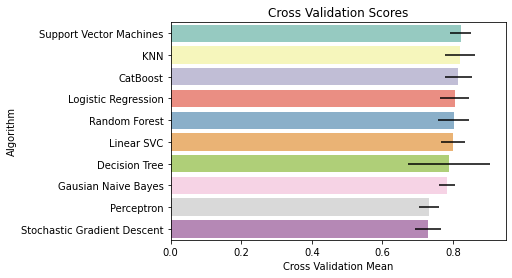

In [111]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

In [112]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.831 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.835 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.830 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.784 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.864 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.802 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.756 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.824 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.802 total time=   0.0s
[CV 2/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [113]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [114]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [115]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

In [116]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [117]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [118]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [119]:
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [120]:
submit.to_csv("C:/Users/benz_/PycharmProjects/pythonProject1/titanic/svm_titanic.csv", index = False)